<a href="https://colab.research.google.com/github/9M3a1h3d9i9/Naive-Bayes-and-ROC-/blob/main/ROC_Compair_NBs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In the name of GOD

# Mohammad Mahdi Shafighy

# Compairs the Types of Naive Bayes Models to CLassification

# Shahed University

# Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, classification_report
from sklearn.preprocessing import MinMaxScaler # For MultinomialNB


# Step 1: Generate Dataset (same as before)


In [ ]:
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10,
                           n_redundant=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# --- New: Preprocessing for MultinomialNB ---
# MultinomialNB requires non-negative features, so we scale them

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Step 2 & 3: Train Existing Models (same as before)


In [ ]:
good_model = GaussianNB()
good_model.fit(X_train, y_train)
good_probs = good_model.predict_proba(X_test)[:, 1]

very_good_model = RandomForestClassifier(n_estimators=100, random_state=42)
very_good_model.fit(X_train, y_train)
very_good_probs = very_good_model.predict_proba(X_test)[:, 1]



# --- New: Train BernoulliNB ---


In [ ]:
bernoulli_model = BernoulliNB()
bernoulli_model.fit(X_train, y_train)
bernoulli_probs = bernoulli_model.predict_proba(X_test)[:, 1]


# --- New: Train MultinomialNB ---


In [ ]:
multinomial_model = MultinomialNB()
multinomial_model.fit(X_train_scaled, y_train)
multinomial_probs = multinomial_model.predict_proba(X_test_scaled)[:, 1]


# Step 4: Calculate ROC Metrics (including new models)


In [ ]:
good_fpr, good_tpr, _ = roc_curve(y_test, good_probs)
very_good_fpr, very_good_tpr, _ = roc_curve(y_test, very_good_probs)
bernoulli_fpr, bernoulli_tpr, _ = roc_curve(y_test, bernoulli_probs)
multinomial_fpr, multinomial_tpr, _ = roc_curve(y_test, multinomial_probs)

good_auc = roc_auc_score(y_test, good_probs)
very_good_auc = roc_auc_score(y_test, very_good_probs)
bernoulli_auc = roc_auc_score(y_test, bernoulli_probs)
multinomial_auc = roc_auc_score(y_test, multinomial_probs)

# ... (Step 5: Compare Metrics - remains the same) ...

# Plot ROC Curves (including new models)

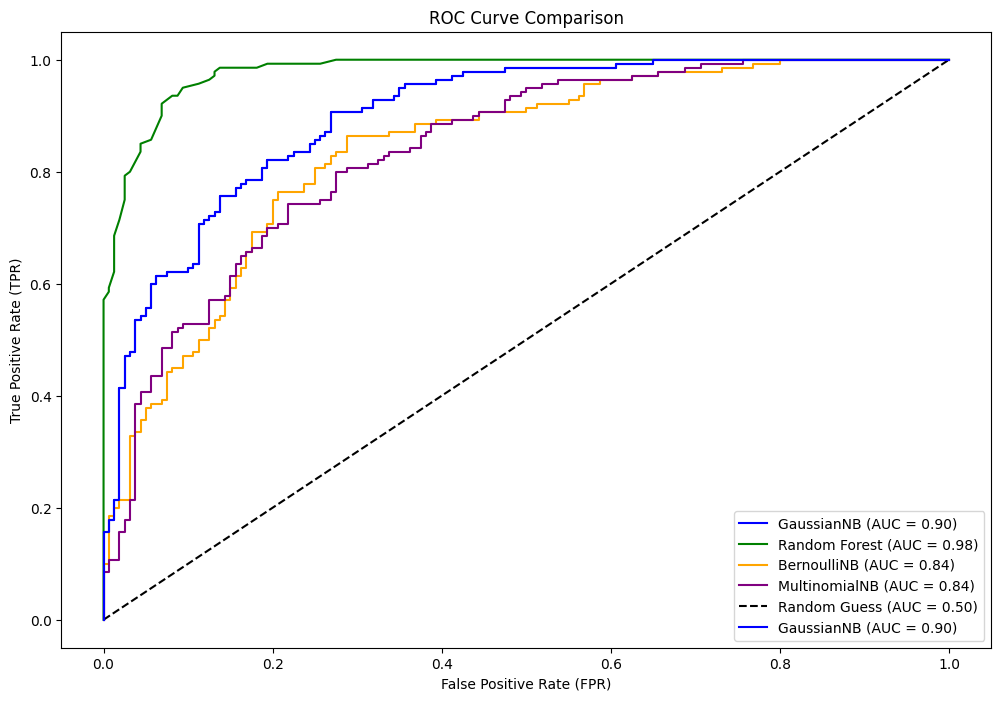

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(good_fpr, good_tpr, label=f"GaussianNB (AUC = {good_auc:.2f})", color='blue')
plt.plot(very_good_fpr, very_good_tpr, label=f"Random Forest (AUC = {very_good_auc:.2f})", color='green')
plt.plot(bernoulli_fpr, bernoulli_tpr, label=f"BernoulliNB (AUC = {bernoulli_auc:.2f})", color='orange')
plt.plot(multinomial_fpr, multinomial_tpr, label=f"MultinomialNB (AUC = {multinomial_auc:.2f})", color='purple')
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess (AUC = 0.50)")

plt.plot(good_fpr, good_tpr, label=f"GaussianNB (AUC = {good_auc:.2f})", color='blue')


plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend()

plt.show()
